In [1]:
import scipy 
import numpy as np
import pandas as pd
import pandas.api.types as ptypes
import matplotlib.pyplot as plt
import seaborn as sns
import rdkit
import os
import sys

In [3]:
class DataAnalysis():
    
    def __init__(self, protein, fingerprint, y_col='Ki'):
        sys.path.append('..')
        self.data_paths_ = {
    '5ht1a_Klek' : './cleaned_datasets/5ht1a_Klek_clean.csv',
    '5ht1a_MACCS' : './cleaned_datasets/5ht1a_MACCS_clean.csv',
    '5ht1a_Sub' : './cleaned_datasets/5ht1a_Sub_clean.csv',
    '5ht7_Klek' : './cleaned_datasets/5ht7_Klek_clean.csv',
    '5ht7_MACCS' : './cleaned_datasets/5ht7_MACCS_clean.csv',
    '5ht7_Sub' : './cleaned_datasets/5ht7_Sub_clean.csv',
    'beta2_Klek' : './cleaned_datasets/beta2_Klek_clean.csv',
    'beta2_MACCS' : './cleaned_datasets/beta2_MACCS_clean.csv',
    'beta2_Sub' : './cleaned_datasets/beta2_Sub_clean.csv',
    'd2_Klek' : './cleaned_datasets/d2_Klek_clean.csv',
    'd2_MACCS' : './cleaned_datasets/d2_MACCS_clean.csv',
    'd2_Sub' : './cleaned_datasets/d2_Sub_clean.csv',
    'h1_Klek' : './cleaned_datasets/h1_Klek_clean.csv',
    'h1_MACCS' : './cleaned_datasets/h1_MACCS_clean.csv',
    'h1_Sub' : './cleaned_datasets/h1_Sub_clean.csv'
    }
     
        self.proteins_ = ['5ht1a', '5ht7', 'beta2', 'd2', 'h1']
        self.fingerprints_ = ['Klek', 'Sub', 'MACCS']
        self.y_col = y_col
        
        self.protein = protein
        self.fingerprint = fingerprint
        self.path = self.protein + '_' + self.fingerprint
        if self.path in self.data_paths_.keys():
            self.df = pd.read_csv(self.data_paths_[self.path])
            print(f'{self.fingerprint} FP for protein {self.protein} loaded')
        else:
            self.df = None
            print("Protein and fingerprint combination not found")
            
    def plot_frequency(self):
        x = list(self.df.columns[2:])
        y = list(self.df.iloc[:, 2:].sum())
        plot = pd.DataFrame({'Keys' : x, 'Counts' : y})
        return plot
        

In [3]:
data = DataAnalysis('5ht1a', 'MACCS')
# print(data.df.isna().sum())

MACCS FP for protein 5ht1a loaded
Ki            0
Class         0
MACCSFP3      0
MACCSFP8      0
MACCSFP11     0
             ..
MACCSFP162    0
MACCSFP163    0
MACCSFP164    0
MACCSFP165    0
MACCSFP166    0
Length: 150, dtype: int64


In [24]:
proteins = ['5ht1a', '5ht7', 'beta2', 'd2', 'h1']

keys = []

for protein in proteins:
    data = DataAnalysis(protein, 'MACCS')
    keys.append() = data.plot_frequency()

MACCS FP for protein 5ht1a loaded
MACCS FP for protein 5ht7 loaded
MACCS FP for protein beta2 loaded
MACCS FP for protein d2 loaded
MACCS FP for protein h1 loaded


           Keys  Counts
0      MACCSFP3       4
1      MACCSFP8      30
2     MACCSFP11      84
3     MACCSFP13       4
4     MACCSFP14       6
..          ...     ...
143  MACCSFP162    5141
144  MACCSFP163    5157
145  MACCSFP164    4677
146  MACCSFP165    5159
147  MACCSFP166     311

[148 rows x 2 columns]


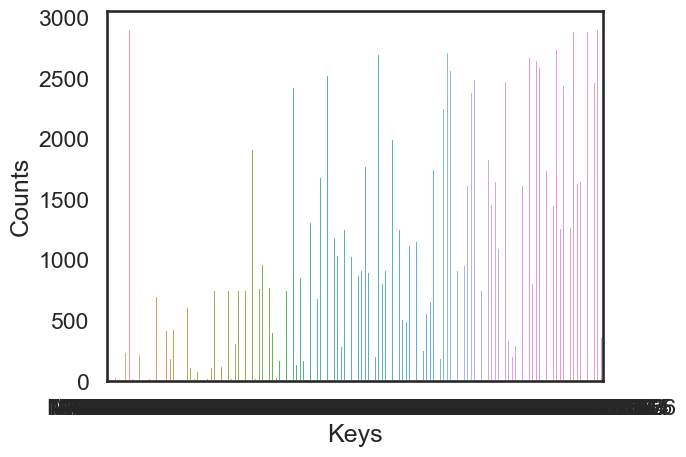

In [23]:
# ten wykres chyba w końcu działał; jak zmienisz sobie [i] w data=keys[] to powinno się wczytać dla innego białka
print(keys[0])
sns.set_style('white')
sns.set_context('talk')
sns.barplot(data=keys[1], x="Keys", y='Counts').set_title('')

plt.show()

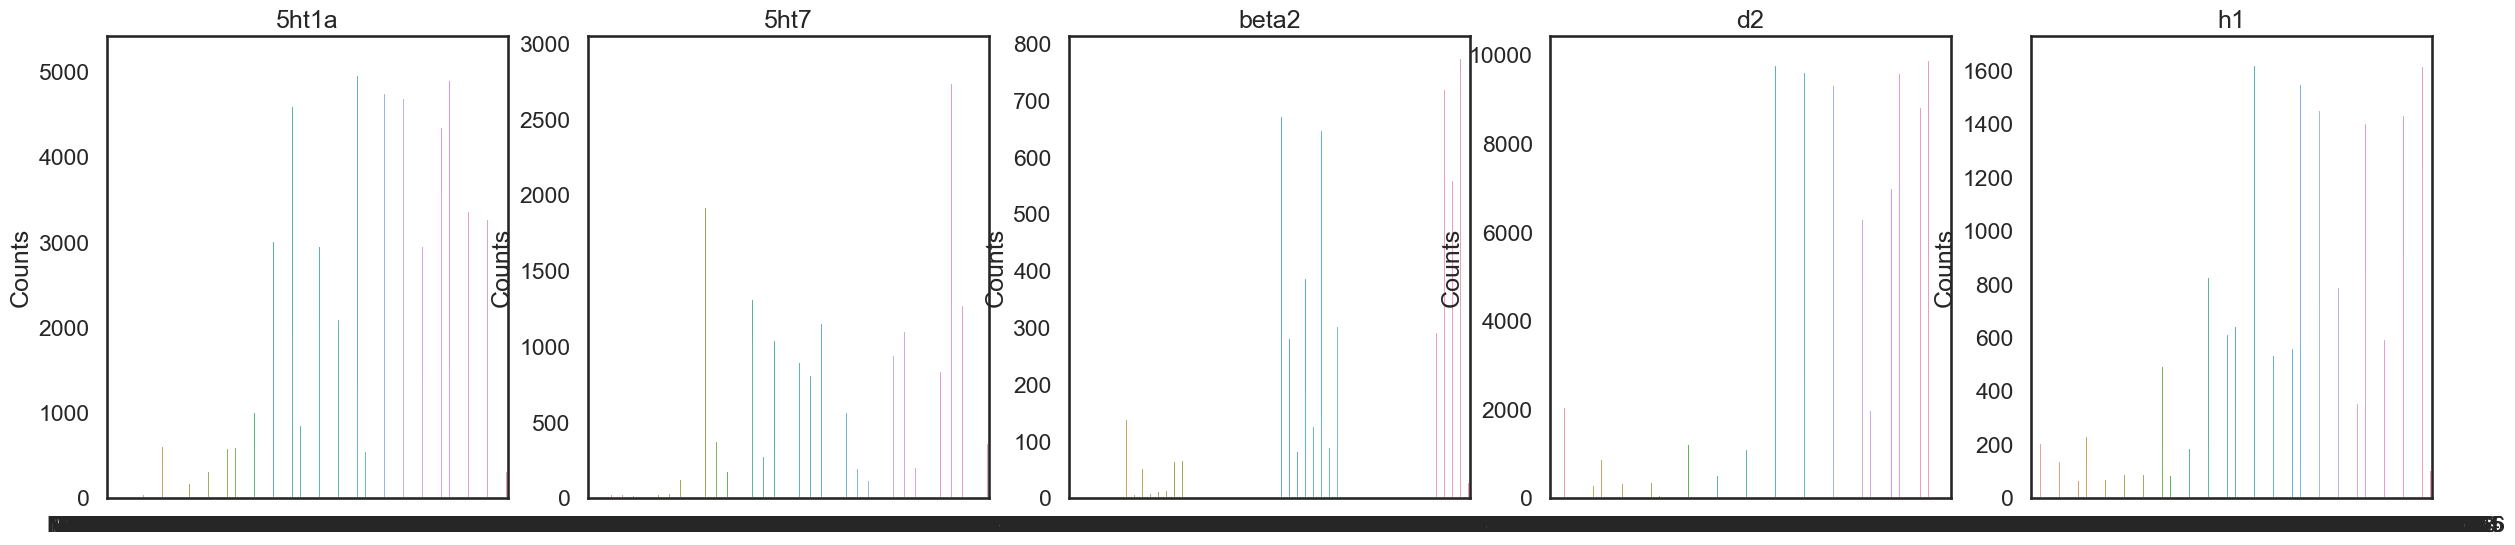

In [20]:
fig, axs = plt.subplots(1,5, figsize=(30,6))
sns.set_style('white')
sns.set_context('talk')
for i, data in enumerate(keys):
    sns.barplot(data=data, x='Keys', y='Counts', ax=axs[i])
    axs[i].set_title(proteins[i])
    axs[i].set_xlabel("")
    
plt.show()

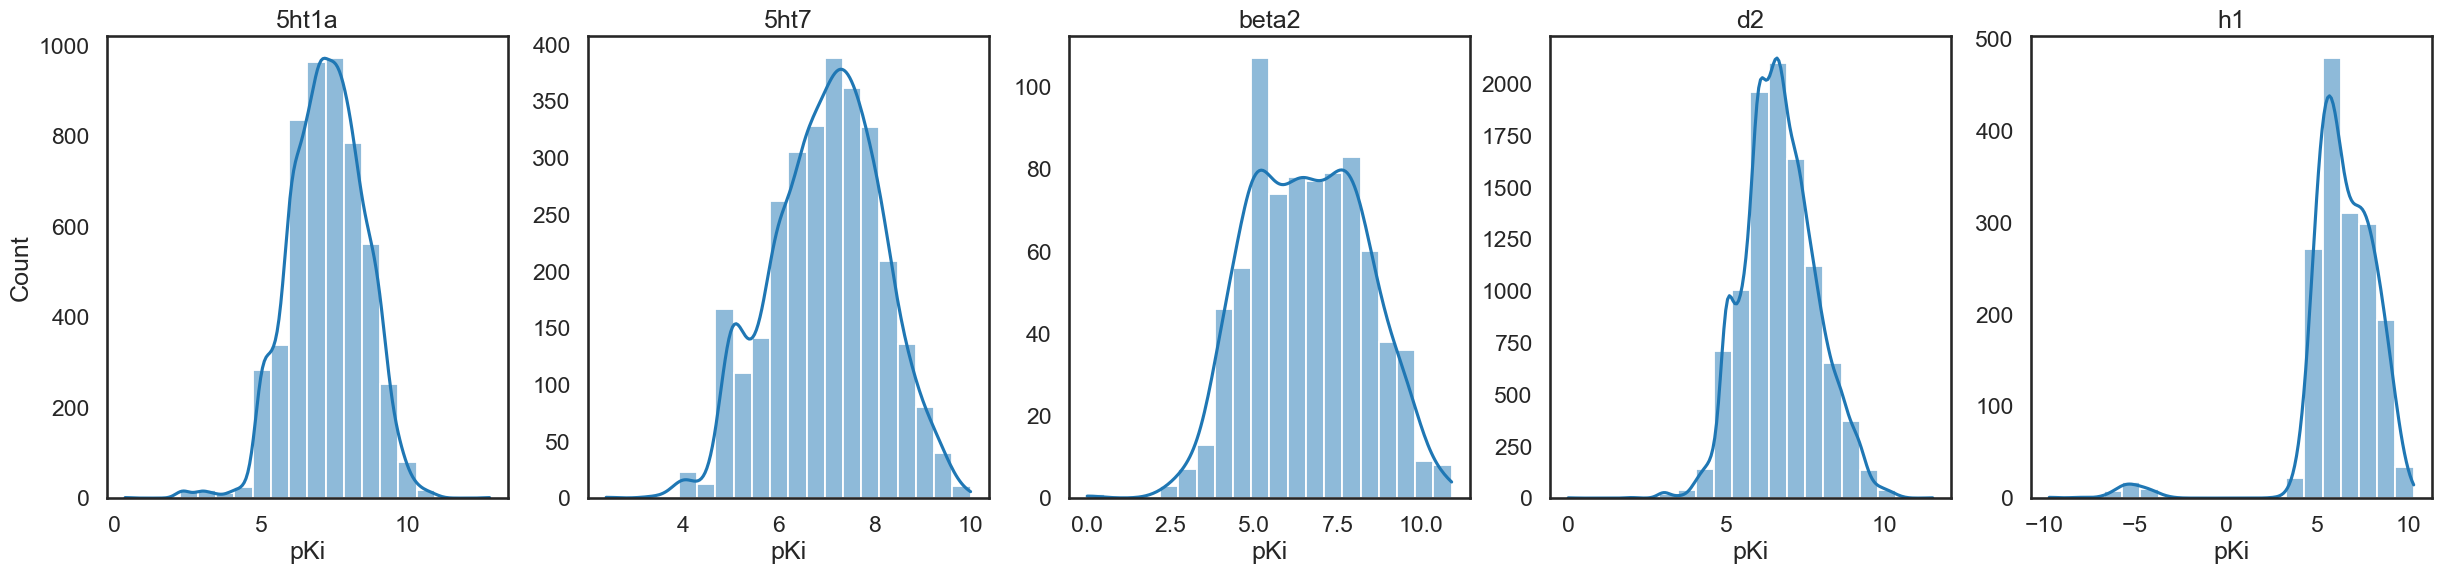

In [44]:
# Tutaj masz dystrubycję pKi dla białek, wystarczy wyciągnąć z pętli
fig, axs = plt.subplots(1,5, figsize=(30,6))
sns.set_style('white')
sns.set_context('talk')
for i, data in enumerate([pkis[0], pkis[1], pkis[2], pkis[3], pkis[4]]):
    sns.histplot(data=data, ax=axs[i], kde=True, bins=20)
    axs[i].set_title(proteins[i])
    axs[i].set_xlabel('pKi')
    axs[i].set_ylabel("")
axs[0].set_ylabel('Count')
plt.savefig("C:/MLDD23/pKi.png", dpi=600, format='png')
plt.show()

In [33]:
proteins = ['5ht1a', '5ht7', 'beta2', 'd2', 'h1']
pkis = []
meh = 10**9

for protein in proteins:
    data = DataAnalysis(protein, 'MACCS')
    pkis.append([-np.log10(x/meh) for x in data.df['Ki']])
    del data
    
print(np.min(pkis[0]))

MACCS FP for protein 5ht1a loaded
MACCS FP for protein 5ht7 loaded
MACCS FP for protein beta2 loaded
MACCS FP for protein d2 loaded
MACCS FP for protein h1 loaded
0.36000000000016513


5160
      Value Protein   0
0  6.065502   5ht1a NaN
1  7.841638   5ht1a NaN
2  7.036212   5ht1a NaN
3  7.769551   5ht1a NaN
4  7.886057   5ht1a NaN 25579


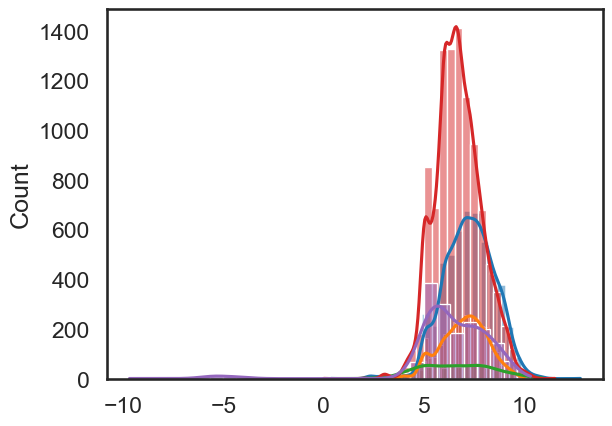

In [34]:
# tutaj próba tego wykresu wyżej ale inaczej; wyszło brzydko to olej
pkis_dict = {
    '5ht1a' : pkis[0],
    '5ht7' : pkis[1],
    'beta2' : pkis[2],
    'd2' : pkis[3],
    'h1' : pkis[4]
}


df = pd.DataFrame(pkis[0], columns=['Value'])
df['Protein'] = ['5ht1a' for protein in range(len(pkis[0]))]

for sth, protein in zip(pkis, proteins):
    df2 = pd.DataFrame(sth)
    df2['Protein'] = [protein for x in range(len(sth))]
    df = pd.concat([df, df2])

print(len(pkis[0]))
print(df.head(), len(df))

for values in pkis:
    sns.histplot(data=values, kde=True, bins=30)

# plt.savefig("C:MLDD23/", dpi='figure', format='png')
plt.show()

In [ ]:
# nie działa
proteins = ['5ht1a', '5ht7', 'beta2', 'd2', 'h1']
data = DataAnalysis('5ht1a', 'MACCS')
data.df['pKi'] = [-np.log(x) for x in data.df['Ki']]
data.df = data.df.sort_values(by='pKi', ascending=False)

sns.set_style('white')
sns.set_context('talk')
sns.histplot(data=data.df['pKi'], kde=True, bins=30)

In [45]:
# tym bardziej nie działa
data = DataAnalysis('5ht1a', 'MACCS')
x = list(x.strip('MACCS').strip("FP") for x in data.df.columns[2:])
y = list(data.df.iloc[:, 2:].sum())


plot = pd.DataFrame({'Keys' : x, 'Counts' : y})
# plot = plot.sort_values(by='Counts', ascending=False)
sns.set_style('white')


bars = sns.barplot(data=plot, x='Keys', y='Counts').set(xticklabels=[])

plt.plot()

MACCS FP for protein 5ht1a loaded


AttributeError: module 'matplotlib.pyplot' has no attribute 'fig'

In [ ]:
# Data Clean-Up

In [46]:
# wczytanie danych i melt do odpowiedniego formatu
data = pd.read_csv('./missing.csv', sep=';')
data = pd.melt(data, id_vars=['Protein', 'Fingerprint'], value_vars=['Missing', 'Duplicated', 'Redundant'], var_name='Type', value_name = 'Value')
data['Hue'] = pd.Series([0 if x == "Missing" else 1 if x == 'Duplicated' else 2 for x in data['Type']]).astype('category')

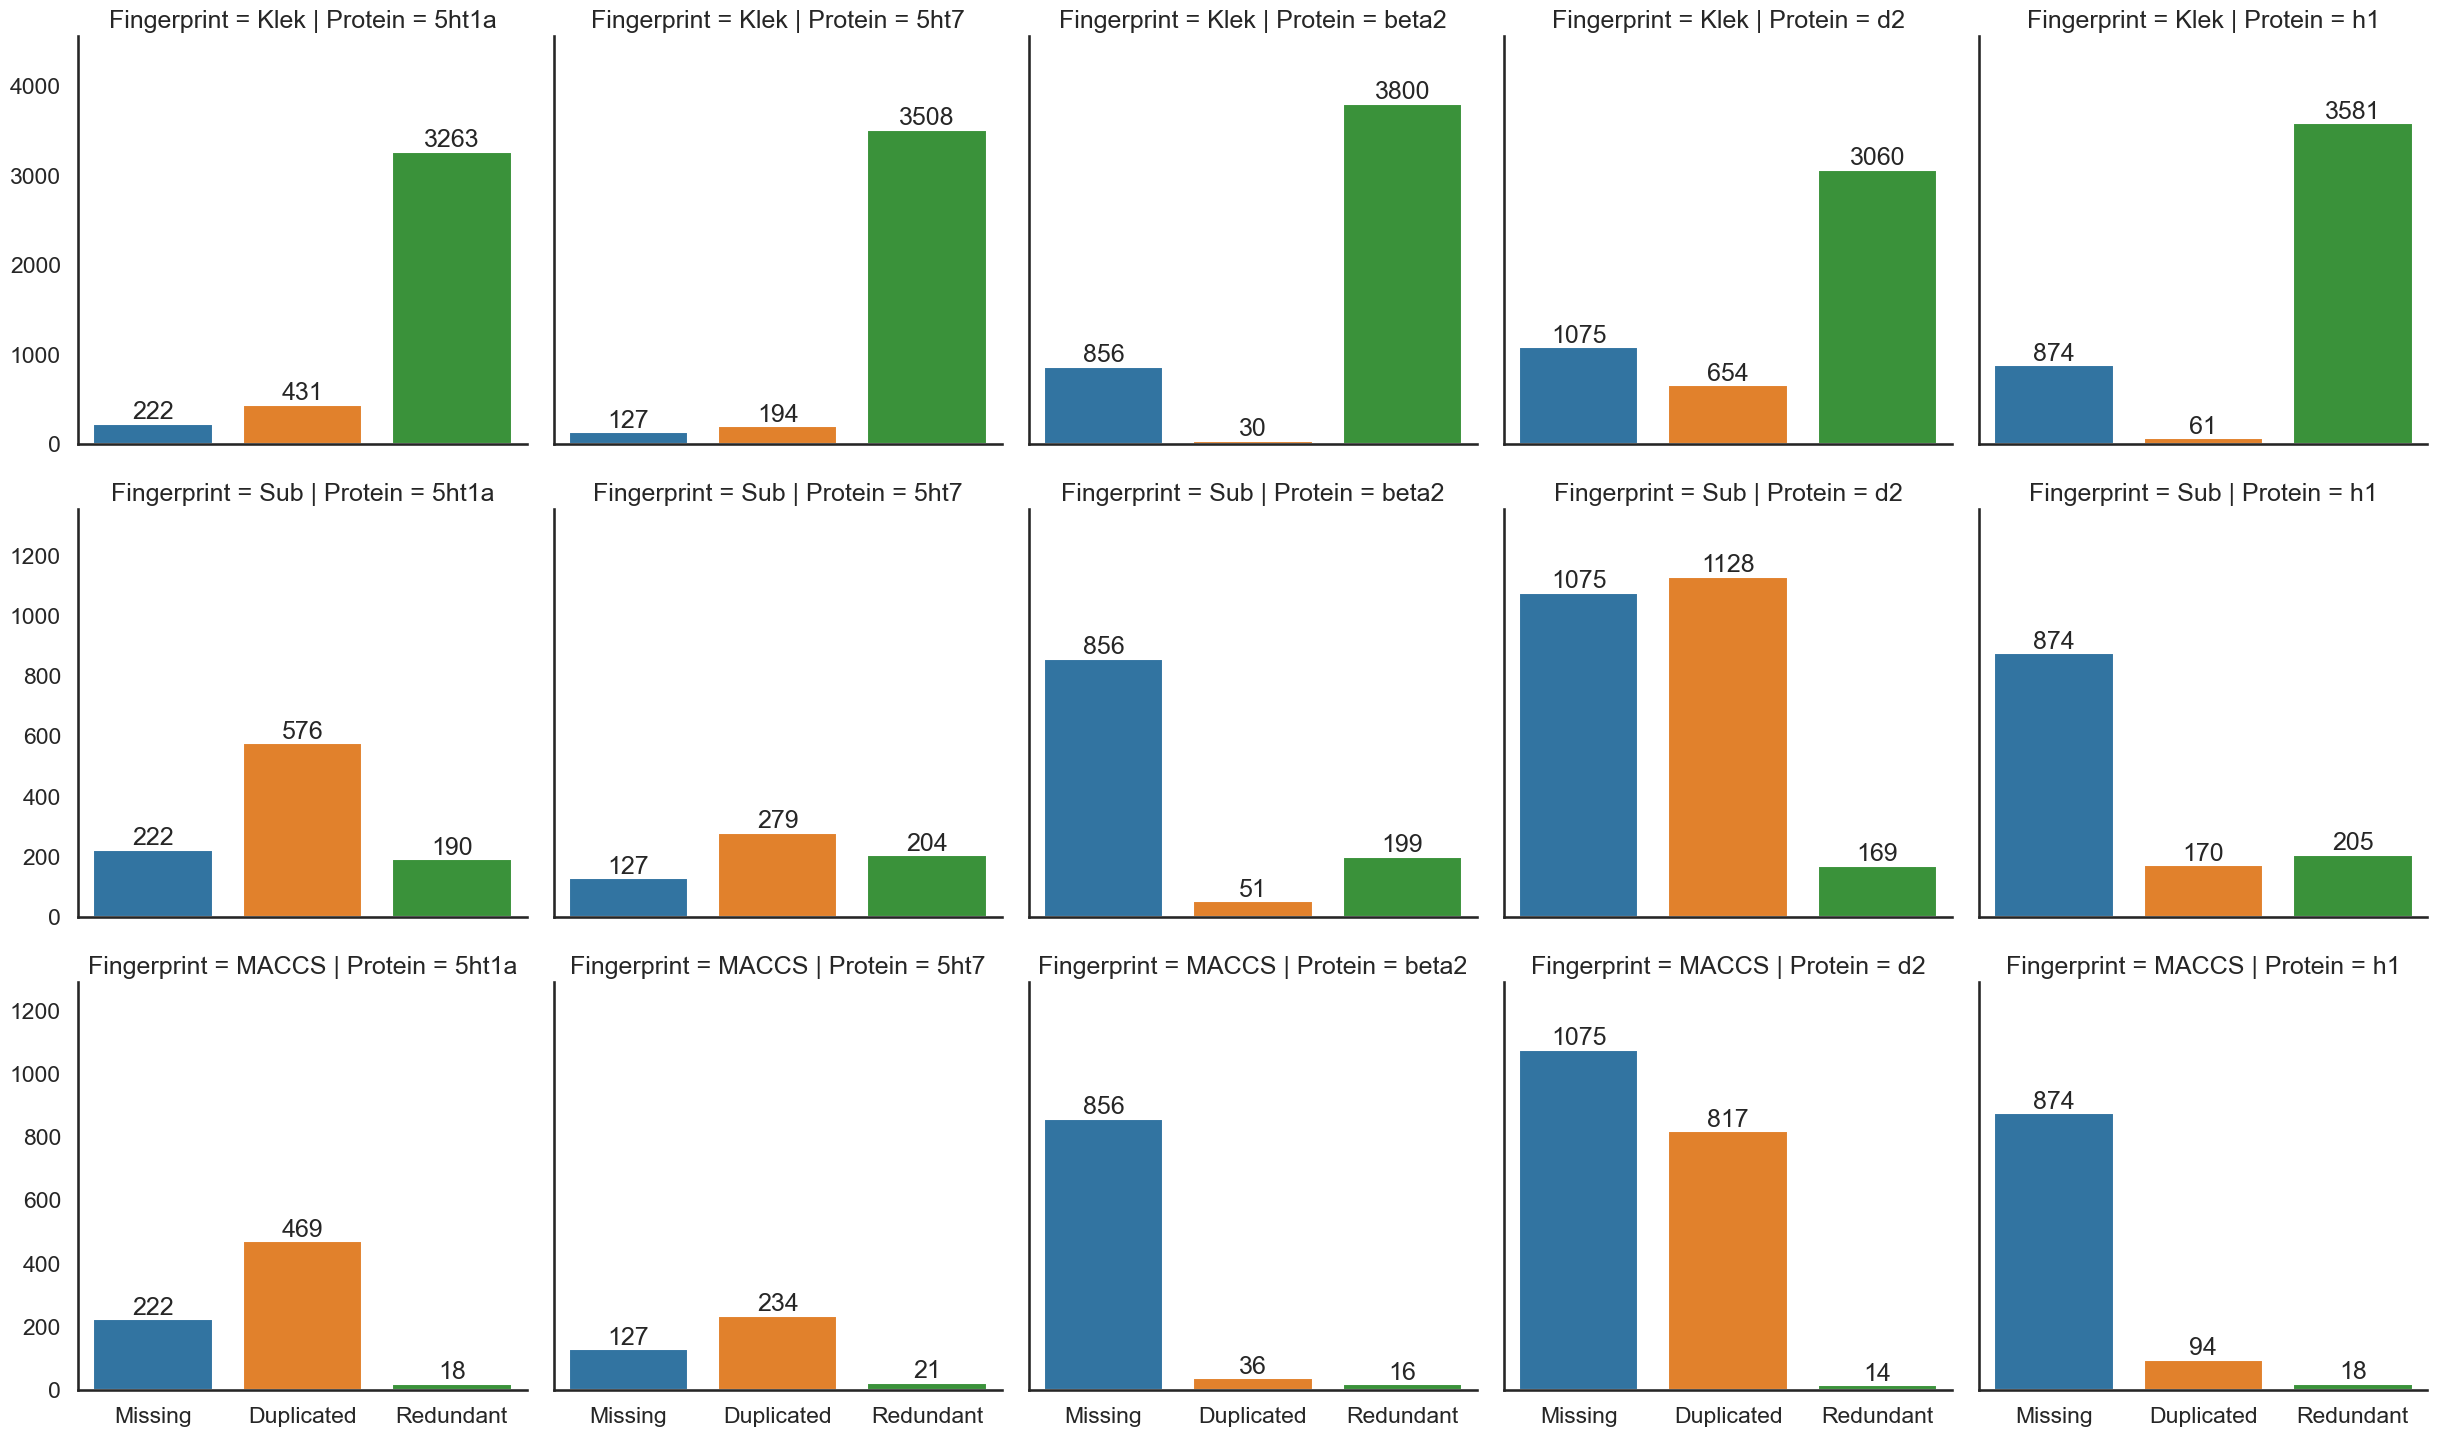

In [48]:
# tutaj one są razem wczytane, ale jak zmodyfikujesz sobie komórkę wyżej żeby tego nie rozdzielała na format długi, 
# to powinno się w miarę łatwo przerobić na osobne wykresy; 
# ten jest tbh spoko i już po angielsku, więc może można zostawić jak jest
sns.set_style('white')
sns.set_context('talk')
ax = sns.catplot(data=data, col='Protein', row='Fingerprint', kind='bar', x='Type', y='Value', sharey='row')
ax.set(xlabel=None, ylabel=None)

for x in ax.axes.ravel():
    for c in x.containers:
        labels = [f'{(v.get_height()):.0f}' for v in c]
        x.bar_label(c, labels=labels, label_type='edge')
    x.margins(y=0.2)

plt.savefig("C:/MLDD23/Fingerprints.png", dpi=600, format='png')
plt.show()